Enter Row Number :  15
Velocity separation (v_separation):  400
Sigma (width):  20
Asymmetry (0 to 1):  0.25
Minimum velocity for plot range:  -600
Maximum velocity for plot range:  600
Number of points to compute in the range:  200


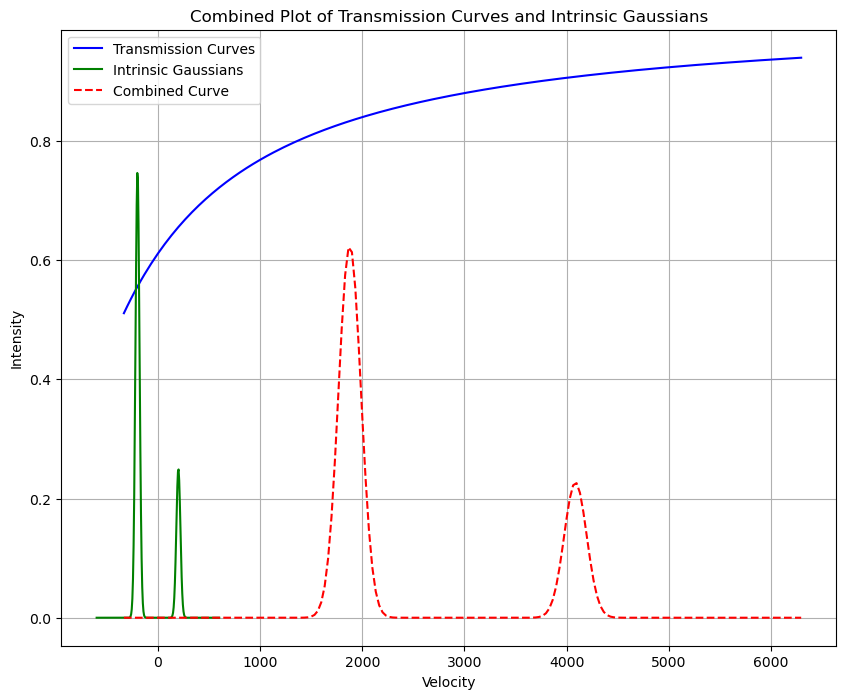

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from intrinsic_gaussians import instrinsic_gaussians
from transmission import plot_transmission_curves

def combined_plot():
    # Transmission curve
    row_number = int(input("Enter Row Number : "))# Example row number; change as needed
    x_transmission, y_transmission = plot_transmission_curves(row_number)

    v_separation = float(input("Velocity separation (v_separation): "))
    sigma = float(input("Sigma (width): "))
    asymmetry = float(input("Asymmetry (0 to 1): "))
    velocity_min = float(input("Minimum velocity for plot range: ")) ## have to put (-200, 200) otherwise the dimensions are not same
    velocity_max = float(input("Maximum velocity for plot range: "))
    num_points_velocity = int(input("Number of points to compute in the range: "))

    # Generate velocity range
    velocity =  np.linspace(velocity_min, velocity_max, num_points_velocity)
    x_gaussian, y_gaussian = instrinsic_gaussians(velocity, v_separation, sigma, asymmetry)

    # Multiply the curves
    y_combined = y_transmission * y_gaussian

    # Plot all curves
    plt.figure(figsize=(10, 8))
    plt.plot(x_transmission, y_transmission, label="Transmission Curves", color="blue")
    plt.plot(x_gaussian, y_gaussian, label="Intrinsic Gaussians", color="green")
    plt.plot(x_transmission, y_combined, label="Combined Curve", color="red", linestyle="--")
    plt.xlabel("Velocity")
    plt.ylabel("Intensity")
    plt.title("Combined Plot of Transmission Curves and Intrinsic Gaussians")
    plt.legend()
    plt.grid()
    plt.show()


if __name__=="__main__":
    combined_plot()

ValueError: x and y must have same first dimension, but have shapes (200,) and (2, 200)

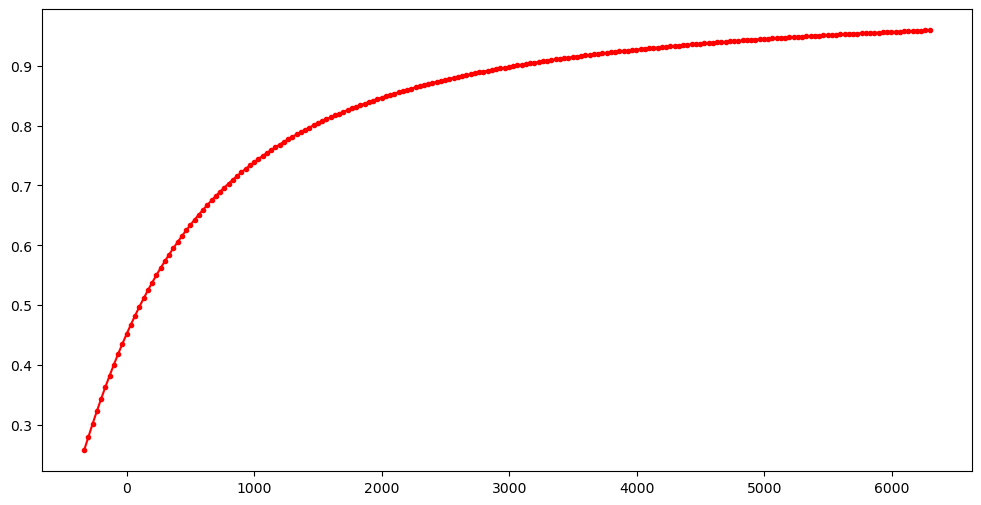

In [4]:
import numpy as np
import matplotlib.pyplot as plt


file_path = 'D:/Master-Thesis/21cmFAST-master/Output/Tot_Tau_lists/output'

with open(file_path, 'r') as file:
    lines = file.readlines()
    row1 = list(map(float, lines[0].strip().split()[5:])) 
    row2 = list(map(float, lines[17].strip().split()[5:]))


x_values = np.array(row1[::2])  
y_values_1 = np.array(row2)

transmission_H1 = np.exp(-np.array(row2))


# Gaussian function
def gaussian(velocity, delta_v, sigma, amplitude=1):
    return amplitude * np.exp(-0.5 * ((velocity - delta_v) / sigma)**2)

# Parameters 
delta_v = 200  # Velocity offset (km/s)
sigma = 50     # Standard deviation (km/s)
amplitude = 1  # Peak amplitude
asymmetry = 0.25

def instrinsic_gaussians(velocity, v_separation, sigma, l_red_l_total):
    l_red = l_red_l_total
    l_blue = 1 - l_red

    # First Gaussian (blueshifted)
    gaussian_blue = gaussian(velocity, -v_separation / 2, sigma, amplitude=l_blue)

    # Second Gaussian (redshifted)
    gaussian_red = gaussian(velocity, v_separation / 2, sigma, amplitude=l_red)

    # Combining them
    combined_profile = gaussian_blue + gaussian_red
    return velocity, combined_profile

    
# Compute Gaussian profile
gaussian_profile = instrinsic_gaussians(x_values, delta_v, sigma, asymmetry)

# Multiply Gaussian profile with the transmission
combined_profile = gaussian_profile * transmission_H1

# Plotting the results
plt.figure(figsize=(12, 6))

# Original transmission plot
plt.plot(x_values, transmission_H1, marker='o', color='red', markersize=3, label='Transmission H1')

# Gaussian profile
plt.plot(x_values, gaussian_profile, color='blue', label='Gaussian Profile')

# Combined profile
plt.plot(x_values, combined_profile, color='green', linestyle='--', label='Combined (Gaussian × Transmission)')

# Labels and legends
plt.xlabel('Velocity Offset (km/s)')
plt.ylabel('Transmission / Flux Density')
plt.title('Gaussian × Transmission Profile')
plt.grid()
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(x_values, transmission_H1, marker='o', color = 'Red', markersize = 3, label = 'Halo 1(mass = +, Rbub = + cMpc)')
plt.xlabel('Velocity_offset(km/s)')
plt.ylabel('Transmission')
plt.grid()
plt.legend()
